# Notebook to test and evaluate the libary on Binary Classification problems

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import skprofiling

import pandas as pd
from sklearn.linear_model import LogisticRegression

## Load Data

In [3]:
df = pd.read_csv("../examples/data/titanic/train.csv")

In [4]:
# Shuffle dataframe
df = df.sample(frac=1)

n_instances = df.shape[0]
train_size = int(n_instances * 0.8)

df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S


In [6]:
df_train_processed = (
    pd.get_dummies(df_train.drop(["Survived", "Name", "Ticket", "PassengerId", "Cabin"], axis=1))
    .fillna(-1)
)

df_train_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
359,3,-1.0,0,0,7.8792,1,0,0,1,0
534,3,30.0,0,0,8.6625,1,0,0,0,1
207,3,26.0,0,0,18.7875,0,1,1,0,0
351,1,-1.0,0,0,35.0000,0,1,0,0,1
575,3,19.0,0,0,14.5000,0,1,0,0,1


In [7]:
df_test_processed = (
    pd.get_dummies(df_test.drop(["Survived", "Name", "Ticket", "PassengerId", "Cabin"], axis=1))
    .fillna(-1)
)

df_test_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
357,2,38.0,0,0,13.000,1,0,0,0,1
788,3,1.0,1,2,20.575,0,1,0,0,1
171,3,4.0,4,1,29.125,0,1,0,1,0
88,1,23.0,3,2,263.000,1,0,0,0,1
312,2,26.0,1,1,26.000,1,0,0,0,1


---

## Create Model

In [8]:
clf = LogisticRegression().fit(df_train_processed, df_train["Survived"])

/home/tiago/anaconda3/envs/skprofiling/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
y_true = df_test["Survived"].values
y_pred = clf.predict_proba(df_test_processed)[:, 1]

---

# Statistical Metrics

These are statistical metrics that show some quality of the model.

Since some of the metrics are threshold dependent, here is displayed the best value found by varying the threshold.

<br>

,Best Value,Best Threshold
Area Under ROC Curve,0.884108,NaN
F1-Score,0.789809,0.33
Accuracy,0.815642,0.33
Average Precision-Recall,0.883680,NaN
Jaccard Score,0.652632,0.33
Humming Loss,0.815642,0.33


<br>

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       101
           1       0.84      0.69      0.76        78

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



---

# Plots

The plots shown here are meant to give insights about the distributions of the model

## Score Distribution

This plot should give some clarity about how is the score distributed for each class.

Usually, the more separated are the scores, the best the model is.

Areas with high overlap represent non-confidant decisions.

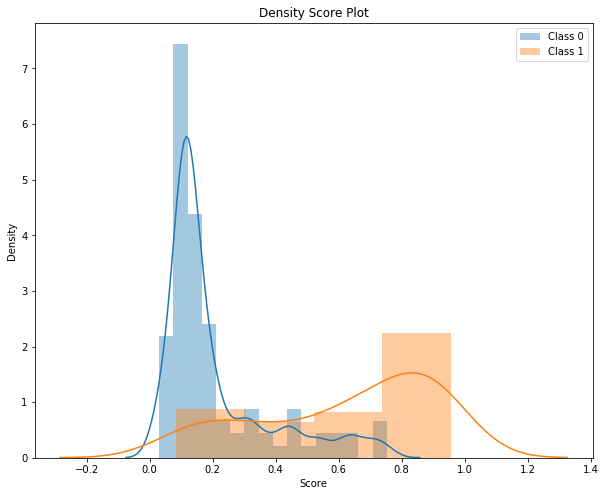

## ROC Curve

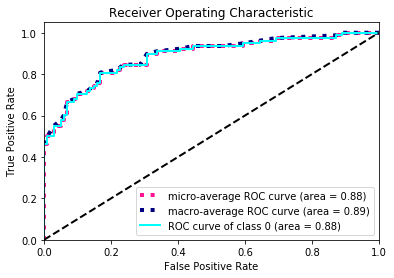

In [39]:
skprofiling.classification_report(y_true, y_pred)